Files already downloaded and verified
Files already downloaded and verified
--- Train with AdamW ---
Epoch 1/30, Loss: 4.2813, Train Acc: 4.73%, Val Acc: 7.30%, Test Acc: 7.51%                        
Epoch 2/30, Loss: 3.9559, Train Acc: 9.28%, Val Acc: 10.35%, Test Acc: 10.37%                        
Epoch 3/30, Loss: 3.7690, Train Acc: 11.84%, Val Acc: 13.17%, Test Acc: 13.15%                        
Epoch 4/30, Loss: 3.6285, Train Acc: 14.17%, Val Acc: 14.93%, Test Acc: 14.66%                        
Epoch 5/30, Loss: 3.5381, Train Acc: 15.85%, Val Acc: 16.59%, Test Acc: 16.66%                        
Epoch 6/30, Loss: 3.4623, Train Acc: 17.41%, Val Acc: 17.85%, Test Acc: 17.43%                        
Epoch 7/30, Loss: 3.3801, Train Acc: 18.61%, Val Acc: 17.83%, Test Acc: 18.14%                        
Epoch 8/30, Loss: 3.3271, Train Acc: 19.51%, Val Acc: 20.12%, Test Acc: 20.06%                        
Epoch 9/30, Loss: 3.2856, Train Acc: 20.48%, Val Acc: 20.35%, Test Acc: 20.57% 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 10/30, Loss: 3.2411, Train Acc: 20.99%, Val Acc: 20.75%, Test Acc: 20.85%                        
Epoch 11/30, Loss: 3.1941, Train Acc: 22.00%, Val Acc: 20.50%, Test Acc: 20.32%                        
Epoch 12/30, Loss: 3.1663, Train Acc: 22.46%, Val Acc: 22.35%, Test Acc: 22.26%                        
Epoch 13/30, Loss: 3.1273, Train Acc: 23.28%, Val Acc: 22.80%, Test Acc: 22.83%                        
Epoch 14/30, Loss: 3.0808, Train Acc: 24.06%, Val Acc: 23.45%, Test Acc: 23.37%                        
Epoch 15/30, Loss: 3.0685, Train Acc: 24.50%, Val Acc: 23.85%, Test Acc: 23.65%                        
Epoch 16/30, Loss: 3.0368, Train Acc: 25.07%, Val Acc: 24.32%, Test Acc: 24.91%                        
Epoch 17/30, Loss: 2.9978, Train Acc: 25.84%, Val Acc: 24.92%, Test Acc: 24.74%                        
Epoch 18/30, Loss: 2.9874, Train Acc: 25.76%, Val Acc: 24.85%, Test Acc: 24.55%                        
Epoch 19/30, Loss: 2.9701, Train Acc: 26.34%, Val Acc: 24.92%, T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 20/30, Loss: 2.9349, Train Acc: 27.05%, Val Acc: 25.88%, Test Acc: 25.66%                        
Epoch 21/30, Loss: 2.9316, Train Acc: 26.92%, Val Acc: 24.97%, Test Acc: 26.07%                        
Epoch 22/30, Loss: 2.9127, Train Acc: 27.30%, Val Acc: 26.42%, Test Acc: 26.42%                        
Epoch 23/30, Loss: 2.8942, Train Acc: 27.68%, Val Acc: 26.29%, Test Acc: 25.81%                        
Epoch 24/30, Loss: 2.8687, Train Acc: 28.11%, Val Acc: 26.14%, Test Acc: 26.58%                        
Epoch 25/30, Loss: 2.8574, Train Acc: 28.46%, Val Acc: 27.27%, Test Acc: 27.68%                        
Epoch 26/30, Loss: 2.8518, Train Acc: 28.52%, Val Acc: 26.67%, Test Acc: 27.23%                        
Epoch 27/30, Loss: 2.8417, Train Acc: 28.77%, Val Acc: 27.65%, Test Acc: 27.23%                        
Epoch 28/30, Loss: 2.8278, Train Acc: 29.28%, Val Acc: 28.20%, Test Acc: 27.53%                        
Epoch 29/30, Loss: 2.8129, Train Acc: 29.18%, Val Acc: 27.99%, T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 30/30, Loss: 2.8013, Train Acc: 29.46%, Val Acc: 27.60%, Test Acc: 27.35%                        


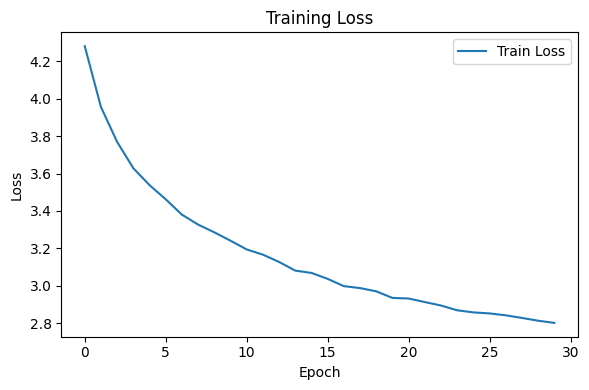

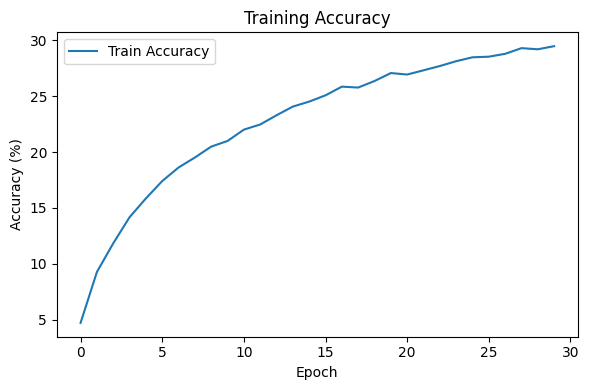

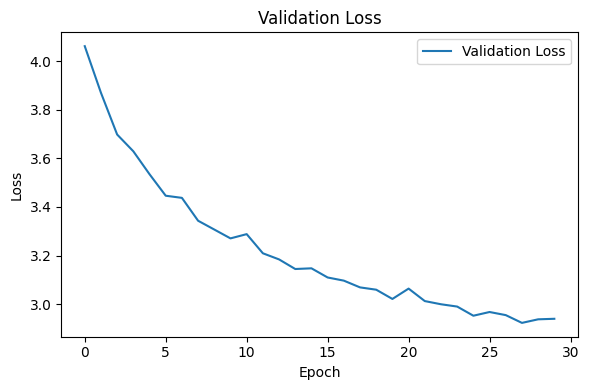

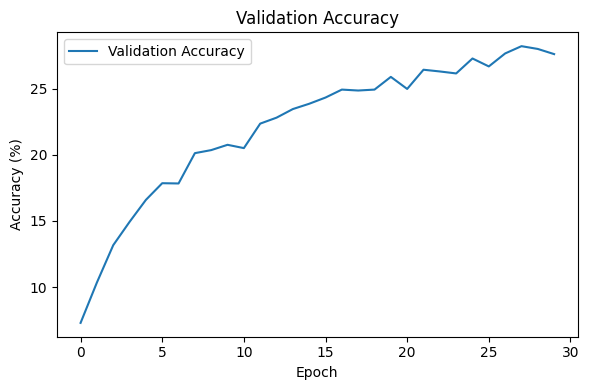

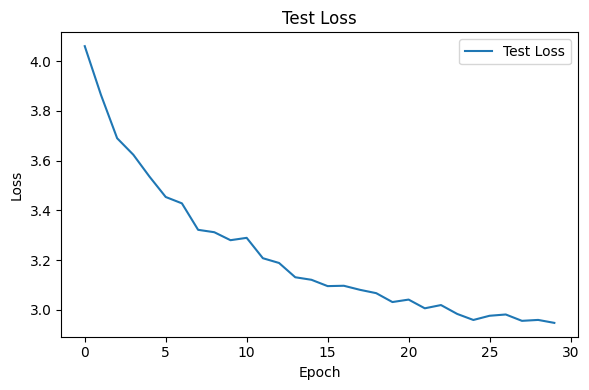

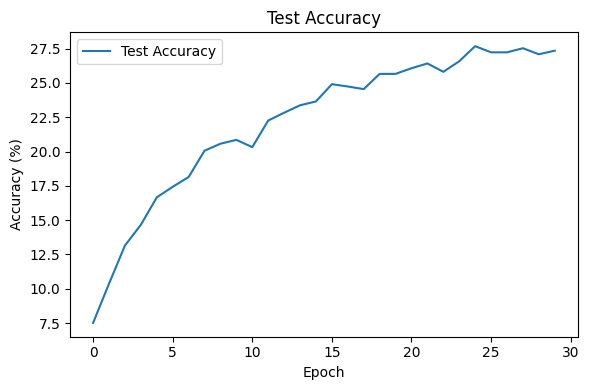

In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from google.colab import files

# Training settings
epochs = 30  # Adjust epochs based on computational resources
batch_size = 128
# momentum = 0.95
weight_decay = 5e-5
lr= 1e-3

# Define LeNet-5 architecture
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 64, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 384)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(384, 192)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(192, 100)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x

# Load and split CIFAR-100 dataset
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Flip orizzontale casuale
    transforms.RandomRotation(15),  # Rotazione casuale fino a ±15 gradi
    transforms.RandomCrop(32, padding=4),  # Ritaglio casuale con padding
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Traslazione casuale
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Prospettiva casuale
    transforms.ColorJitter(
        brightness=0.3,  # Regolazione della luminosità
        contrast=0.3,    # Regolazione del contrasto
        saturation=0.3,  # Regolazione della saturazione
        hue=0.2          # Regolazione della tonalità
    ),
    transforms.ToTensor(),  # Converti in tensore
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizzazione
])

torch.manual_seed(42) # Set the seed for reproducibility
torch.cuda.manual_seed_all(42) # Set the seed for reproducibility on GPU

dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
trainset, valset = random_split(dataset, [train_size, val_size])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Device setup
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize model
net_adamw = LeNet5().to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer and scheduler
adamw_optimizer = optim.AdamW(net_adamw.parameters(), lr=lr, betas=(0.95, 0.999), weight_decay=weight_decay)
scheduler_adamw = optim.lr_scheduler.CosineAnnealingLR(adamw_optimizer, T_max=150)

# Training function
def train_model(optimizer, scheduler, model, criterion, trainloader, valloader , testloader, device, epochs, save_checkpoint_interval=10):
    train_losses, val_losses, test_losses = [], [], []
    train_accuracies, val_accuracies, test_accuracies = [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss, correct_train, total_train = 0.0, 0, 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()
        train_loss = running_loss / len(trainloader)
        train_accuracy = 100. * correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        correct_val, total_val, val_loss = 0, 0, 0.0
        with torch.no_grad():
            for inputs, labels in valloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                total_val += labels.size(0)
                correct_val += predicted.eq(labels).sum().item()
        val_loss /= len(valloader)
        val_losses.append(val_loss)
        val_accuracy = 100. * correct_val / total_val
        val_accuracies.append(val_accuracy)

        # Test
        correct_test, total_test, test_loss = 0, 0, 0.0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = outputs.max(1)
                total_test += labels.size(0)
                correct_test += predicted.eq(labels).sum().item()
        test_loss /= len(testloader)
        test_losses.append(test_loss)
        test_accuracy = 100. * correct_test / total_test
        test_accuracies.append(test_accuracy)

        scheduler.step()

        # Checkpointing
        if (epoch + 1) % save_checkpoint_interval == 0:
            checkpoint_filename = f'checkpoint_epoch_{epoch + 1}.pth'
            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss.item(),
            }
            checkpoint_path = os.path.join('./', checkpoint_filename)
            torch.save(checkpoint, checkpoint_path)
            print(f'Checkpoint saved at epoch {epoch + 1}: {checkpoint_path}')

            #Download the checkpoint
            files.download(checkpoint_filename)

        print(f'Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%                        ')

    return train_losses, val_losses, test_losses,  train_accuracies, val_accuracies, test_accuracies

# Train model
print("--- Train with AdamW ---")
adamw_train_loss, adamw_val_loss, adamw_test_loss, adamw_train_acc, adamw_val_acc, adamw_test_acc= train_model(adamw_optimizer, scheduler_adamw, net_adamw, criterion, trainloader, valloader, testloader, device, epochs)

# Save model
torch.save(net_adamw.state_dict(), 'net_adamw.pth')

# Plot results
# Plot Training Loss
plt.figure(figsize=(6, 4))
plt.plot(adamw_train_loss, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('train_loss.png')
plt.show()

# Plot Training Accuracy
plt.figure(figsize=(6, 4))
plt.plot(adamw_train_acc, label='Train Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.tight_layout()
plt.savefig('train_accuracy.png')
plt.show()

# Plot Validation Loss
plt.figure(figsize=(6, 4))
plt.plot(adamw_val_loss, label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('val_loss.png')
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(6, 4))
plt.plot(adamw_val_acc, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.tight_layout()
plt.savefig('val_accuracy.png')
plt.show()

# Plot Test Loss
plt.figure(figsize=(6, 4))
plt.plot(adamw_test_loss, label='Test Loss')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('test_loss.png')
plt.show()

# Plot Test Accuracy
plt.figure(figsize=(6, 4))
plt.plot(adamw_test_acc, label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.tight_layout()
plt.savefig('test_accuracy.png')
plt.show()





